In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
import umap


## Imports

In [3]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploring the data : 

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.apply(lambda x: len(x.unique()))


fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
wine_data['fixed acidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [9]:
wine_data['fixed acidity']

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

In [10]:
wine_data['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [11]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## Doing the Tasks

In [12]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [13]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Appliying PCA

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### Apply t-SNE


In [15]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

### Apply UMAP


In [16]:
umap_model = umap.UMAP(n_components=2) 
X_umap = umap_model.fit_transform(X)

### Plotting : 

Text(0, 0.5, 'PC 2')

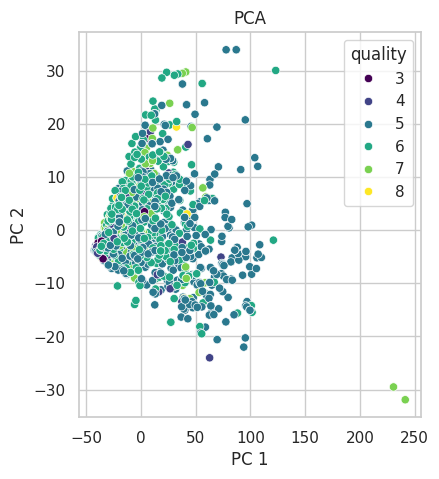

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA')
plt.xlabel("PC 1")
plt.ylabel("PC 2")

Text(0, 0.5, 'PC 2')

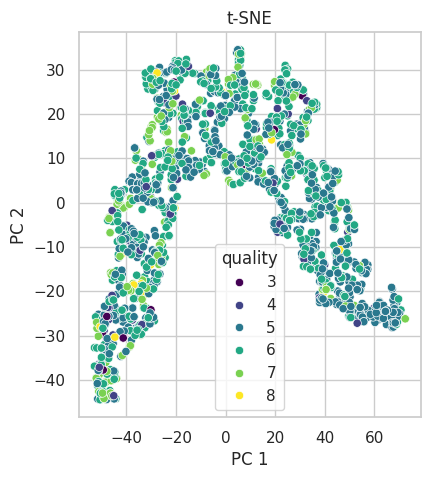

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(132)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', legend='full')
plt.title('t-SNE')
plt.xlabel("PC 1")
plt.ylabel("PC 2")

Text(0, 0.5, 'PC 2')

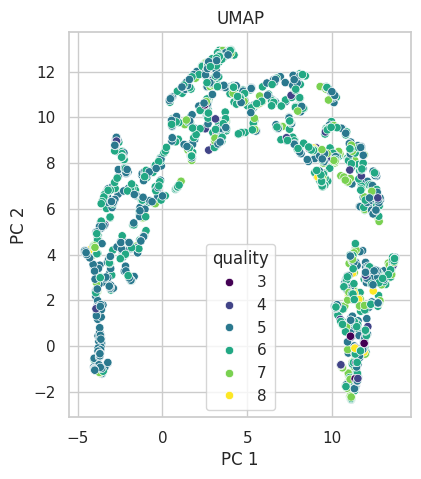

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(133)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', legend='full')
plt.title('UMAP')
plt.xlabel("PC 1")
plt.ylabel("PC 2")

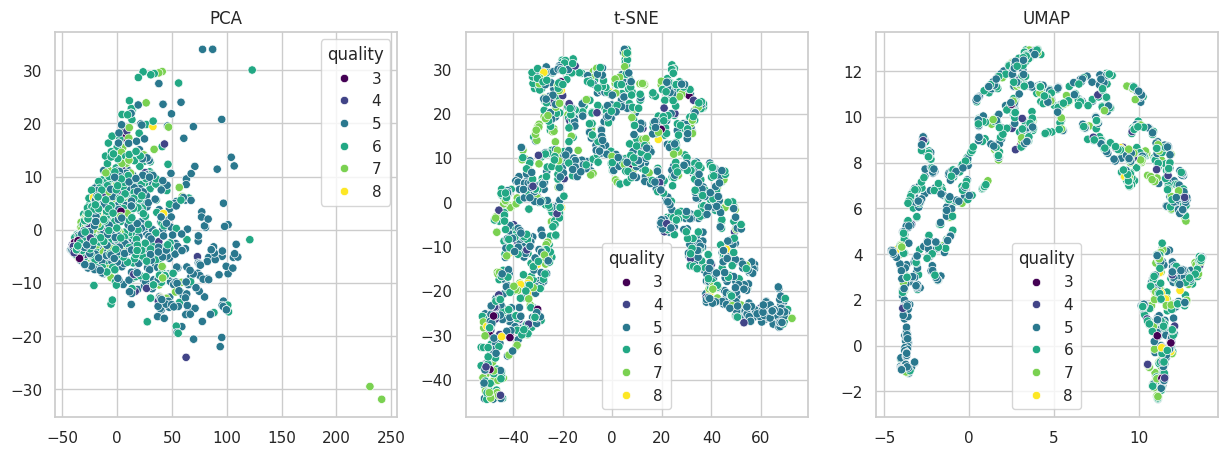

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA')

plt.subplot(132)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', legend='full')
plt.title('t-SNE')

plt.subplot(133)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', legend='full')
plt.title('UMAP')

plt.show()

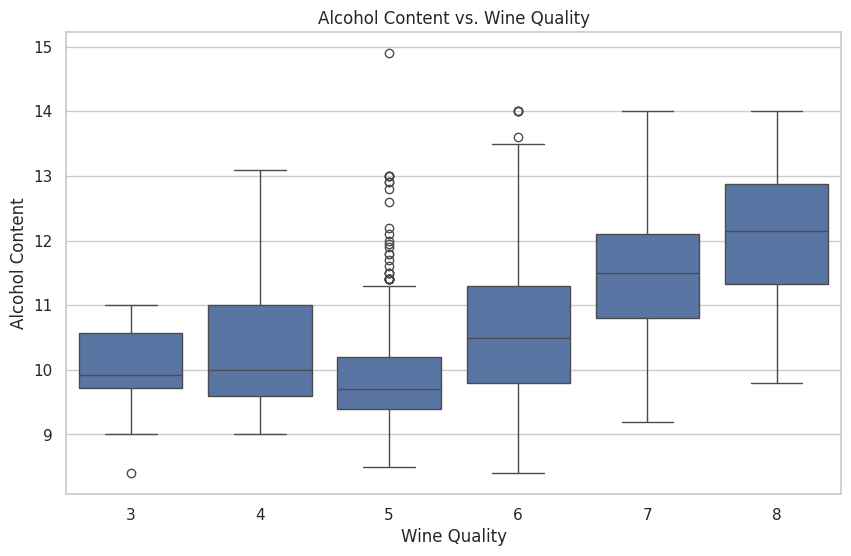

t-statistic: 17.822763607394528, p-value: 6.016774226316707e-65
Conclusion: Alcohol content contributes significantly to wine quality.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set the style for better visualizations
sns.set(style="whitegrid")

# Box plot to compare alcohol content in wines with different quality ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_data)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

# Separate wines with different quality ratings
high_quality = wine_data[wine_data['quality'] >= 7]['alcohol']
low_quality = wine_data[wine_data['quality'] < 7]['alcohol']

# Perform t-test
t_stat, p_value = ttest_ind(high_quality, low_quality)

# Display the results
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Conclusions
if p_value < 0.05:
    print("Conclusion: Alcohol content contributes significantly to wine quality.")
else:
    print("Conclusion: Alcohol content may not significantly contribute to wine quality.")


In [58]:
# Example Hypothesis
# H0: Alcohol content does not contribute significantly to the quality of a wine.
# Why: We hypothesize that the alcohol content might not be a crucial factor in determining wine quality.

# Apply a statistical test (e.g., t-test) to investigate the hypothesis
from scipy.stats import ttest_ind

# Separate wines with different quality ratings
high_quality = wine_data[wine_data['quality'] >= 7]['alcohol']
low_quality = wine_data[wine_data['quality'] < 7]['alcohol']

# Perform t-test
t_stat, p_value = ttest_ind(high_quality, low_quality)

# Display the results
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Conclusions
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. Alcohol content contributes significantly to wine quality.")
else:
    print("Conclusion: Fail to reject the null hypothesis. Alcohol content may not significantly contribute to wine quality.")


t-statistic: 17.822763607394528, p-value: 6.016774226316707e-65
Conclusion: Reject the null hypothesis. Alcohol content contributes significantly to wine quality.


In [62]:
df = wine_data

In [71]:
import scipy.stats as stats
import numpy as np

In [67]:
high_quality_citric_acid = df[df['quality'] == 7]['citric acid']
low_quality_citric_acid = df[df['quality'] == 3]['citric acid']

# Perform a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(high_quality_citric_acid, low_quality_citric_acid)

# Set the significance level
alpha = 0.05

# Draw conclusions
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in mean citric acid levels."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in mean citric acid levels."

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(conclusion)

T-statistic: 3.1946794712044952
P-value: 0.0016186480309506308
Reject the null hypothesis. There is a significant difference in mean citric acid levels.


In [72]:
# Assuming a threshold of 6 for quality (you can adjust this threshold)
df['wine_type'] = np.where(df['quality'] > 6, 'red', 'white')

# Extract alcohol content for red and white wines
alcohol_red = df[df['wine_type'] == 'red']['alcohol']
alcohol_white = df[df['wine_type'] == 'white']['alcohol']

# Perform a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(alcohol_red, alcohol_white)

# Set the significance level
alpha = 0.05

# Draw conclusions
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in mean alcohol content."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in mean alcohol content."

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(conclusion)


T-statistic: 17.822763607394528
P-value: 6.016774226316707e-65
Reject the null hypothesis. There is a significant difference in mean alcohol content.


In [75]:
# Extract alcohol content for red and white wines
alcohol_red = df[df['wine_type'] == 'red']['alcohol']
alcohol_white = df[df['wine_type'] == 'white']['alcohol']

# Perform a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(alcohol_red, alcohol_white)

# Set the significance level
alpha = 0.05

# Draw conclusions
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in mean alcohol content."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in mean alcohol content."

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(conclusion)


T-statistic: 17.822763607394528
P-value: 6.016774226316707e-65
Reject the null hypothesis. There is a significant difference in mean alcohol content.


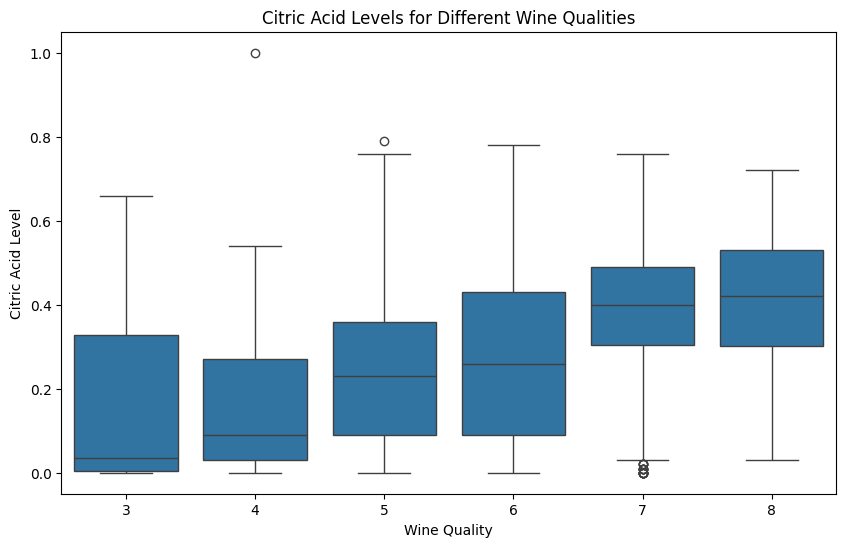

T-statistic: 3.1946794712044952
P-value: 0.0016186480309506308
Reject the null hypothesis. There is a significant difference in mean citric acid levels.


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize citric acid levels for high and low-quality wines
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='citric acid', data=df)
plt.title('Citric Acid Levels for Different Wine Qualities')
plt.xlabel('Wine Quality')
plt.ylabel('Citric Acid Level')
plt.show()

# Perform a t-test for independent samples
high_quality_citric_acid = df[df['quality'] == 7]['citric acid']
low_quality_citric_acid = df[df['quality'] == 3]['citric acid']

t_statistic, p_value = stats.ttest_ind(high_quality_citric_acid, low_quality_citric_acid)

# Set the significance level
alpha = 0.05

# Draw conclusions
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in mean citric acid levels."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in mean citric acid levels."

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(conclusion)



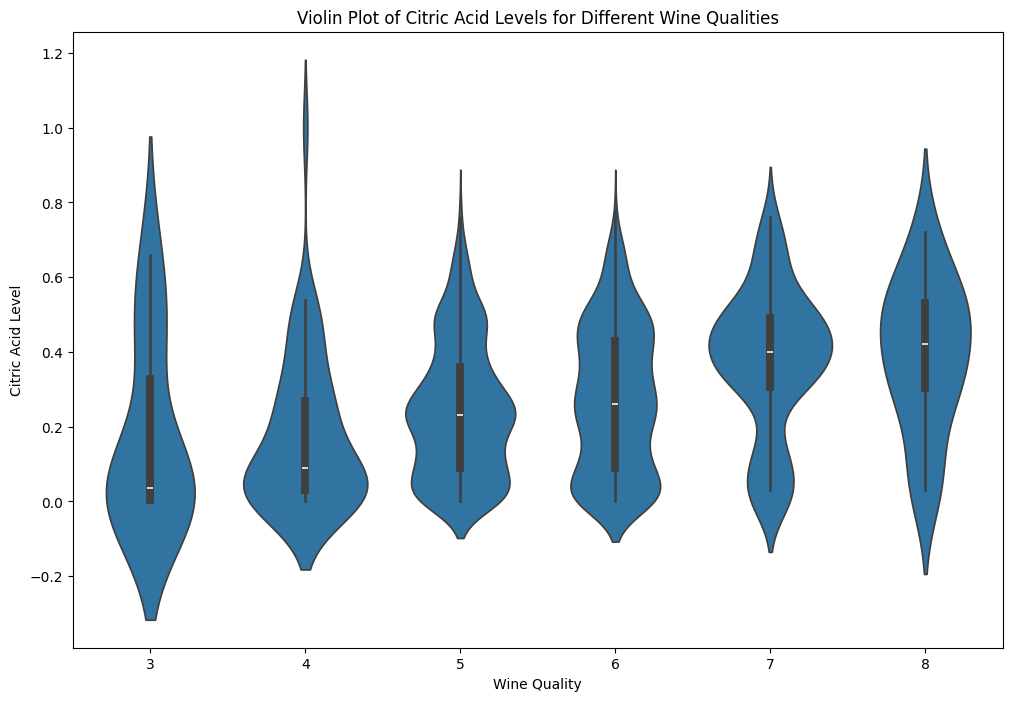

/home/harsh/WS2023/DSS/HW4/dss-env/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/harsh/WS2023/DSS/HW4/dss-env/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/harsh/WS2023/DSS/HW4/dss-env/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/harsh/WS2023/DSS/HW4/dss-env/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


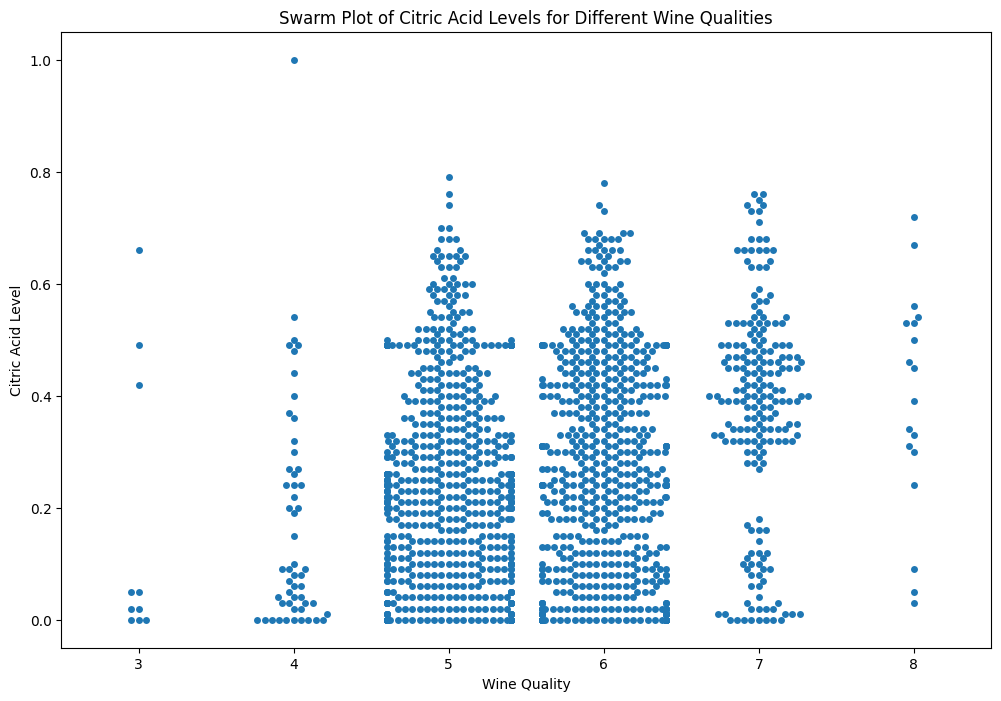

T-statistic: 3.1946794712044952
P-value: 0.0016186480309506308
Reject the null hypothesis. There is a significant difference in mean citric acid levels.


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Visualize citric acid levels for high and low-quality wines using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='quality', y='citric acid', data=df)
plt.title('Violin Plot of Citric Acid Levels for Different Wine Qualities')
plt.xlabel('Wine Quality')
plt.ylabel('Citric Acid Level')
plt.show()

# Visualize citric acid levels for high and low-quality wines using a swarm plot
plt.figure(figsize=(12, 8))
sns.swarmplot(x='quality', y='citric acid', data=df, dodge=True)
plt.title('Swarm Plot of Citric Acid Levels for Different Wine Qualities')
plt.xlabel('Wine Quality')
plt.ylabel('Citric Acid Level')
plt.show()

# Perform a t-test for independent samples
high_quality_citric_acid = df[df['quality'] == 7]['citric acid']
low_quality_citric_acid = df[df['quality'] == 3]['citric acid']

t_statistic, p_value = stats.ttest_ind(high_quality_citric_acid, low_quality_citric_acid)

# Set the significance level
alpha = 0.05

# Draw conclusions
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in mean citric acid levels."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in mean citric acid levels."

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(conclusion)
